Created By: Andy McDonald

The following tutorial illustrates how to calculate key petrophysical properties using pandas

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### PP Equation

In [60]:
# Shale Volume
def shale_volume(gamma_ray, gamma_ray_max, gamma_ray_min):
    vshale = (gamma_ray - gamma_ray_min) / (gamma_ray_max - gamma_ray_min)
    return round(vshale, 4)

shale_volume(120, 200, 15)

0.5676

In [35]:
# Total Porosity
def total_porosity(rhob, rho_ma, rho_fl):
    phit = (rho_ma - rhob) / (rho_ma - rho_fl)
    return round(phit, 4)

total_porosity(2.45, 2.65, 1)

In [61]:
# Effective Porosity
def effective_porosity(phit, vshale, shale_porosity):
    phie=phit-(vshale*shale_porosity)
    return round(phie, 4)

effective_porosity(0.4, 0.3, 0.3)

0.31

In [39]:
# Saturation Archie
def sw_archie(por, rt, rw, a, M, N):
    sw = ((a / (por ** M)) * (rw/rt))**(1/N)
    return sw

sw_archie(0.1, 10, 0.1, 1, 2, 2)

In [62]:
# Saturation Simandoux
def sw_simandoux(phie, rt, rw, archieA, archieM, archieN, vshale, rshale):
    A = (1 - vshale) * archieA * rw / (phie ** archieM)
    B = A * vshale / (2 * rshale)
    C = A / rt
    
    sw = ((B **2 + C)**0.5 - B) **(2 / archieN)
    return sw

sw_simandoux(0.1, 10, 0.1, 1, 2, 2, 0.3, 2)

0.4627373132569206

### Load From LAS

In [43]:
'''
import lasio
import pandas as pd

# Load the LAS file
las = lasio.read("Data/Bekok Deep CSV/BEKOK DEEP-1RDR1 ST1_EDIT_V1.csv")

# Convert LAS data to a DataFrame
well = las.df()

# Display the DataFrame
print(df.head())
'''

'\nimport lasio\nimport pandas as pd\n\n# Load the LAS file\nlas = lasio.read("Data/Bekok Deep CSV/BEKOK DEEP-1RDR1 ST1_EDIT_V1.csv")\n\n# Convert LAS data to a DataFrame\nwell = las.df()\n\n# Display the DataFrame\nprint(df.head())\n'

### Load From CSV

In [44]:
well = pd.read_csv("Data/Bekok Deep CSV/BEKOK DEEP-1RDR1 ST1_EDIT_V1.csv", header=0, skiprows=[1])

In [45]:
well.head()

,wellName,datasetName,DEPTH,GR,NPHI,RHOB,RT,RW
0,BEKOK DEEP-1RDR1 ST1,EDIT,920.1912,58.150002,0.5829,0.3133,81.669998,0.4
1,BEKOK DEEP-1RDR1 ST1,EDIT,920.3436,60.279999,0.6209,0.9111,82.050003,0.4
2,BEKOK DEEP-1RDR1 ST1,EDIT,920.4960,63.570000,0.5858,0.7302,63.779999,0.4
3,BEKOK DEEP-1RDR1 ST1,EDIT,920.6484,60.060001,0.5806,0.5309,58.529999,0.4
4,BEKOK DEEP-1RDR1 ST1,EDIT,920.8008,55.009998,0.5900,0.3580,59.230000,0.4


In [46]:
well.replace(-9999.00, np.nan, inplace=True)

In [47]:
well.describe()

,DEPTH,GR,NPHI,RHOB,RT,RW
count,3064.000000,2916.000000,2815.000000,2849.000000,2900.000000,3.064000e+03
mean,1153.591800,92.148042,0.306508,2.287815,3.332169,4.000000e-01
std,134.819889,16.576373,0.063171,0.162779,15.901999,5.552021e-17
min,920.191200,18.719999,0.073700,0.012200,0.970000,4.000000e-01
25%,1036.891500,80.594999,0.270550,2.243000,1.700000,4.000000e-01
50%,1153.591800,93.079998,0.300700,2.331800,2.370000,4.000000e-01
75%,1270.292100,104.695002,0.334100,2.366500,2.930000,4.000000e-01
max,1386.992400,136.479996,0.908000,2.671000,813.049988,4.000000e-01


(0.0, 250.0)

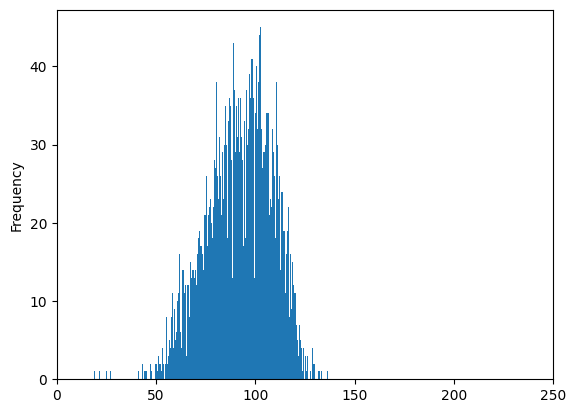

In [48]:
well['GR'].plot(kind='hist', bins=230)
plt.xlim(0, 250)

### Calculate PP Properties

Using the functions created above, we can pass through the required columns in order to calculate the key petrophysical properties

In [49]:
#Calculate Shale Volume
well['VSHALE'] = shale_volume(well['GR'], well['GR'].quantile(q=0.99),
                             well['GR'].quantile(q=0.01))

In [50]:
#Calculate total porosity
well['PHI'] = total_porosity(well['RHOB'], 2.65, 1)

In [51]:
#Calculate effective porosity
well['PHIECALC'] = effective_porosity(well['PHI'],well['VSHALE'],0.3)

In [54]:
#Calculate Archie SW
well['SW'] = sw_archie(well['PHI'], well['RT'], well['RW'], 1, 2, 2)

In [55]:
#Calculate Simandoux SW
well['SW_SIM'] = sw_simandoux(well['PHIECALC'], well['RT'], well['RW'], 1, 2, 2, well['VSHALE'],2)

In [56]:
#Limit SW to 1
well['SW_LIM'] = well['SW'].mask(well['SW']>1, 1)
well['SW__SIM_LIM'] = well['SW_SIM'].mask(well['SW_SIM']>1, 1)

In [57]:
well.describe()

,DEPTH,GR,NPHI,RHOB,RT,RW,VSHALE,PHI,PHIECALC,SW,SW_SIM,SW_LIM,SW__SIM_LIM
count,3064.000000,2916.000000,2815.000000,2849.000000,2900.000000,3.064000e+03,2916.000000,2849.000000,2849.000000,2849.000000,2821.000000,2849.000000,2821.000000
mean,1153.591800,92.148042,0.306508,2.287815,3.332169,4.000000e-01,0.555492,0.219506,0.054384,2.126310,1.453180,0.973465,0.943473
std,134.819889,16.576373,0.063171,0.162779,15.901999,5.552021e-17,0.238269,0.098655,0.149391,0.844001,9.321050,0.117182,0.157425
min,920.191200,18.719999,0.073700,0.012200,0.970000,4.000000e-01,-0.500000,-0.012700,-0.189500,0.047733,0.021900,0.047733,0.021900
25%,1036.891500,80.594999,0.270550,2.243000,1.700000,4.000000e-01,0.389425,0.171800,-0.042500,1.573521,1.059385,1.000000,1.000000
50%,1153.591800,93.079998,0.300700,2.331800,2.370000,4.000000e-01,0.568850,0.192800,0.021500,2.116286,1.265144,1.000000,1.000000
75%,1270.292100,104.695002,0.334100,2.366500,2.930000,4.000000e-01,0.735875,0.246700,0.120300,2.728283,1.492089,1.000000,1.000000
max,1386.992400,136.479996,0.908000,2.671000,813.049988,4.000000e-01,1.192700,1.598700,1.562500,21.944347,495.851337,1.000000,1.000000


### Plot Display

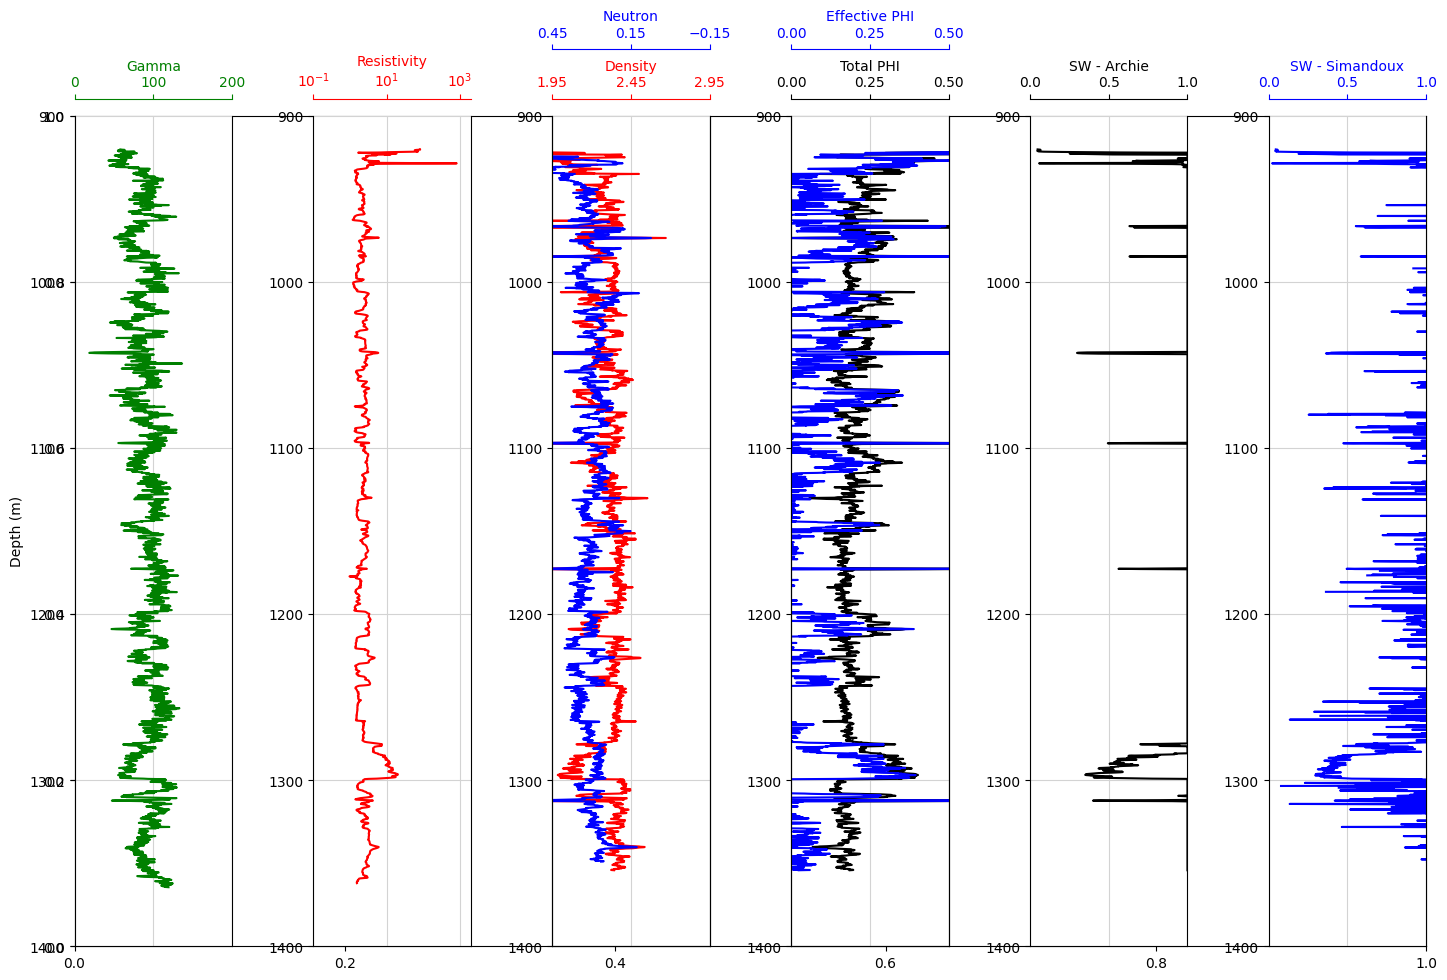

In [58]:
fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,6), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,6), (0,2), rowspan=1, colspan = 1)
ax4 = ax3.twiny() #Twins the y-axis for the density track with the neutron track
ax5 = plt.subplot2grid((1,6), (0,3), rowspan=1, colspan = 1)
ax6 = ax5.twiny()
ax7 = plt.subplot2grid((1,6), (0,4), rowspan=1, colspan = 1)
ax8 = plt.subplot2grid((1,6), (0,5), rowspan=1, colspan = 1)


# Gamma Ray track
ax1.plot("GR", "DEPTH", data = well, color = "green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks
([0, 50, 100, 150, 200])

# Resistivity track
ax2.plot("RT", "DEPTH", data = well, color = "red")
ax2.set_xlabel("Resistivity")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Density track
ax3.plot("RHOB", "DEPTH", data = well, color = "red")
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

# Neutron track placed ontop of density track
ax4.plot("NPHI", "DEPTH", data = well, color = "blue")
ax4.set_xlabel('Neutron')
ax4.xaxis.label.set_color("blue")
ax4.set_xlim(0.45, -0.15)
ax4.set_ylim(4150, 3500)
ax4.tick_params(axis='x', colors="blue")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.spines["top"].set_edgecolor("blue")
ax4.set_xticks([0.45,  0.15, -0.15])

# Porosity track
ax5.plot("PHI", "DEPTH", data = well, color = "black")
ax5.set_xlabel("Total PHI")
ax5.set_xlim(0, 0.5)
ax5.xaxis.label.set_color("black")
ax5.tick_params(axis='x', colors="black")
ax5.spines["top"].set_edgecolor("black")
ax5.set_xticks([0, 0.25, 0.5])

# Porosity track
ax6.plot("PHIECALC", "DEPTH", data = well, color = "blue")
ax6.set_xlabel("Effective PHI")
ax6.set_xlim(0, 0.5)
ax6.xaxis.label.set_color("blue")
ax6.tick_params(axis='x', colors="blue")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.spines["top"].set_visible(True)
ax6.spines["top"].set_edgecolor("blue")
ax6.set_xticks([0, 0.25, 0.5])

# Sw track
ax7.plot("SW_LIM", "DEPTH", data = well, color = "black")
ax7.set_xlabel("SW - Archie")
ax7.set_xlim(0, 1)
ax7.xaxis.label.set_color("black")
ax7.tick_params(axis='x', colors="black")
ax7.spines["top"].set_edgecolor("black")
ax7.set_xticks([0, 0.5, 1])

# Sw track
ax8.plot("SW_SIM", "DEPTH", data = well, color = "blue")
ax8.set_xlabel("SW - Simandoux")
ax8.set_xlim(0, 1)
ax8.xaxis.label.set_color("blue")
ax8.tick_params(axis='x', colors="blue")
ax8.spines["top"].set_edgecolor("blue")
ax8.set_xticks([0, 0.5, 1])



for ax in [ax1, ax2, ax3 ,ax5, ax7, ax8]:
    ax.set_ylim(1400, 900)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))

plt.tight_layout()


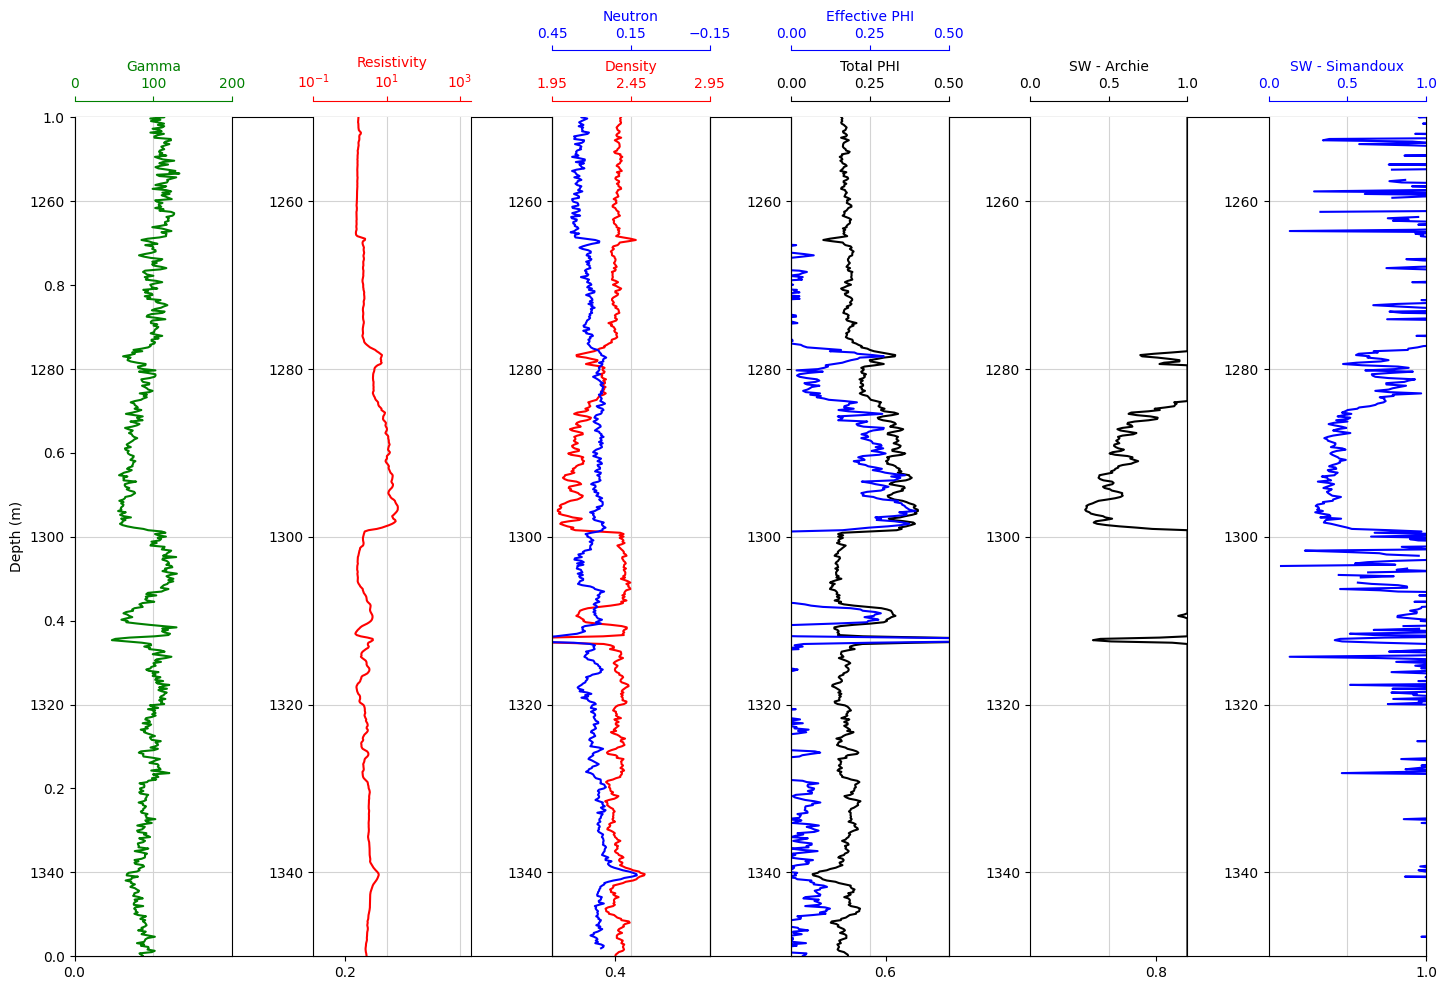

In [59]:
fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,6), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,6), (0,2), rowspan=1, colspan = 1)
ax4 = ax3.twiny() #Twins the y-axis for the density track with the neutron track
ax5 = plt.subplot2grid((1,6), (0,3), rowspan=1, colspan = 1)
ax6 = ax5.twiny()
ax7 = plt.subplot2grid((1,6), (0,4), rowspan=1, colspan = 1)
ax8 = plt.subplot2grid((1,6), (0,5), rowspan=1, colspan = 1)


# Gamma Ray track
ax1.plot("GR", "DEPTH", data = well, color = "green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks
([0, 50, 100, 150, 200])

# Resistivity track
ax2.plot("RT", "DEPTH", data = well, color = "red")
ax2.set_xlabel("Resistivity")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Density track
ax3.plot("RHOB", "DEPTH", data = well, color = "red")
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

# Neutron track placed ontop of density track
ax4.plot("NPHI", "DEPTH", data = well, color = "blue")
ax4.set_xlabel('Neutron')
ax4.xaxis.label.set_color("blue")
ax4.set_xlim(0.45, -0.15)
ax4.set_ylim(4150, 3500)
ax4.tick_params(axis='x', colors="blue")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.spines["top"].set_edgecolor("blue")
ax4.set_xticks([0.45,  0.15, -0.15])

# Porosity track
ax5.plot("PHI", "DEPTH", data = well, color = "black")
ax5.set_xlabel("Total PHI")
ax5.set_xlim(0, 0.5)
ax5.xaxis.label.set_color("black")
ax5.tick_params(axis='x', colors="black")
ax5.spines["top"].set_edgecolor("black")
ax5.set_xticks([0, 0.25, 0.5])

# Porosity track
ax6.plot("PHIECALC", "DEPTH", data = well, color = "blue")
ax6.set_xlabel("Effective PHI")
ax6.set_xlim(0, 0.5)
ax6.xaxis.label.set_color("blue")
ax6.tick_params(axis='x', colors="blue")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.spines["top"].set_visible(True)
ax6.spines["top"].set_edgecolor("blue")
ax6.set_xticks([0, 0.25, 0.5])

# Sw track
ax7.plot("SW_LIM", "DEPTH", data = well, color = "black")
ax7.set_xlabel("SW - Archie")
ax7.set_xlim(0, 1)
ax7.xaxis.label.set_color("black")
ax7.tick_params(axis='x', colors="black")
ax7.spines["top"].set_edgecolor("black")
ax7.set_xticks([0, 0.5, 1])

# Sw track
ax8.plot("SW_SIM", "DEPTH", data = well, color = "blue")
ax8.set_xlabel("SW - Simandoux")
ax8.set_xlim(0, 1)
ax8.xaxis.label.set_color("blue")
ax8.tick_params(axis='x', colors="blue")
ax8.spines["top"].set_edgecolor("blue")
ax8.set_xticks([0, 0.5, 1])


for ax in [ax1, ax2, ax3 ,ax5, ax7, ax8]:
    ax.set_ylim(1350, 1250)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))

plt.tight_layout() 
